## Problem one
1. Implement the Self-Organizing Map algorithm

In [98]:
# SOM
import numpy as np

def gaussian(d, radius):
    return np.exp((-d**2)/(2*radius**2))

class SOM():
    def __init__(self, d, learning_rate = 0.5, width=5, height=5):
        # x y : the map（output) dimensions
        # d : the dimension of data
        # 1. Randomize the map's weight vectors
        self.width = width
        self.height = height
        self.W_dim = width*height
        self.radius = (width+height)/4
        self.W = np.random.randn(self.W_dim, d)
        self.learning_rate = learning_rate
                 
    def train(self, X, training_epoches=50, batch_size=1):
        self.training_epoches = training_epoches
        
        for epoch in range(training_epoches):
            # 2. Traverse each node in the map
            for X_k in X:
                dist = np.zeros([self.W_dim])
                for j in range(self.W_dim):
                    dist[j] =  np.linalg.norm(self.W[j,:]-X_k)
                ind = np.argmin(dist, axis=0)
                #pt = [ind/self.width, ind%self.width]
            # 3. Update the nodes in the neighborhood of the BMU (including the BMU itself) by pulling them closer to the input vector
                cur_radius = self.radius_decay(epoch)
                neighborhoods = self.find_neighborhood(ind, cur_radius)
                for nb in neighborhoods:
                    #influence = (-pt[2] + cur_radius) / cur_radius  # linear scaling of influence
                    influence = gaussian(nb[1], cur_radius)
                    inf_lrd = influence*self.learning_rate_decay(epoch)
                    #ind = p[0]*self.width + p[1]
                    #print ind
                    ind = nb[0]
                    self.W[ind, :] = self.W[ind, :] + inf_lrd*(X_k - self.W[ind,:])

    def radius_decay(self, epoch):
        return self.radius*np.exp(-epoch/self.training_epoches)
        #return ((self.training_epoches - epoch) / self.training_epoches) * self.radius

    def learning_rate_decay(self, epoch):
        #return ((self.training_epoches - epoch) / self.training_epoches) * self.learning_rate
        return self.learning_rate*(0.5**epoch)
    
    def find_neighborhood(self, ind, dist):
        # returns a chessboard distance neighborhood, with distances determined by Euclidean distance
        #   - Meaning, take a square around the center pt
        dist = int(dist)
        pt = [ind/self.width, ind%self.width]
        # This allows the grid to wrap vertically and horizontally
        min_y = int(pt[0] - dist)
        max_y = int(pt[0] + dist)+1
        min_x = int(pt[1] - dist)
        max_x = int(pt[1] + dist)+1
        #print min_y, max_y, min_x, max_x
        # just build the cross product of the bounds
        neighbors = []
        for y in range(min_y, max_y):
            y_piece = (y-pt[0])**2
            y = y + self.height if y < 0 else y % self.height
            for x in range(min_x, max_x):
                # Manhattan
                # d = abs(y-pt[0]) + abs(x-pt[1])
                # Euclidean
                d = (y_piece + (x-pt[1])**2)**0.5
                x = x + self.width  if x < 0 else x % self.width
                id = y*self.width+x
                #neighbors.append((y,x,d))
                neighbors.append((id,d))
        #print ind, pt, neighbors
        return neighbors

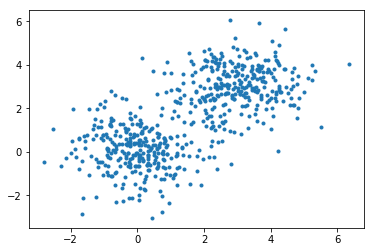

In [104]:
data_path = 'data/hw4-data.txt'
data = np.loadtxt(data_path)
import matplotlib.pyplot as plt
% matplotlib inline

plt.plot(data[:,0], data[:,1],'.')

som = SOM(d=2, learning_rate = 0.1)
som.train(data, training_epoches=10)


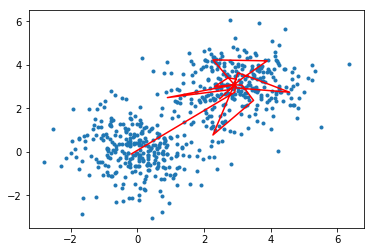

In [105]:
plt.plot(data[:,0], data[:,1],'.')
plt.plot(som.W[:,0], som.W[:,1],'r')